<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [1]:
import os
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Crear la carpeta "data" (si existe no se crea)
if not os.path.exists('data'):
    os.makedirs('data')

# Descargar la base de datos LFW
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)

# Obtener las imágenes y las etiquetas
images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

# Establecer un límite en el número total de imágenes a descargar
limite_total_imagenes = 100  # Puedes ajustar este valor según tus necesidades
contador_imagenes = 0

# Guardar las imágenes en la carpeta "data"
for i in range(len(images)):
    if contador_imagenes >= limite_total_imagenes:
        break
    
    person_name = target_names[labels[i]]
    person_folder = os.path.join('data', person_name)
    
    # Crear una carpeta para cada persona si no existe
    if not os.path.exists(person_folder):
        os.makedirs(person_folder)
    
    # Guardar la imagen en la carpeta correspondiente
    image_path = os.path.join(person_folder, f'image_{i}.jpg')
    plt.imsave(image_path, images[i], cmap='gray')
    
    contador_imagenes += 1


Primero, importamos las bibliotecas necesarias y creamos una carpeta llamada “data”. Luego, utilizamos fetch_lfw_people de scikit-learn para descargar las imágenes de individuos con al menos 25 imágenes. Extraemos las imágenes, etiquetas y nombres de las personas, y establecemos un límite en el número total de imágenes a descargar. Guardamos cada imagen en una subcarpeta dentro de “data” correspondiente al nombre de la persona, utilizando plt.imsave para guardar las imágenes en formato JPG y en escala de grises, lo cual decidimos para simplificar el proceso y reducir el tamaño de los archivos. Finalmente, imprimimos un mensaje confirmando que las imágenes se han descargado y guardado correctamente.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [2]:
# Describir los contenidos de la base de datos
num_imagenes = len(images)
num_personas = len(target_names)
dimensiones_imagen = images[0].shape

print(f"La base de datos contiene {num_imagenes} imágenes de {num_personas} personas distintas.")
print(f"Cada imagen tiene una dimensión de {dimensiones_imagen[0]}x{dimensiones_imagen[1]} píxeles.")

La base de datos contiene 2588 imágenes de 42 personas distintas.
Cada imagen tiene una dimensión de 50x37 píxeles.


Para obtener información sobre la base de datos LFW, primero se calcula el número total de imágenes utilizando len(images), luego se determina el número de personas distintas con len(target_names), y finalmente se obtiene la dimensión de las imágenes con images[0].shape. La base de datos contiene imágenes de rostros de diferentes personas y cada una está asociada con una etiqueta que indica la identidad de la persona. La base de datos contiene 2588 imágenes de 42 personas distintas y cada una tiene una dimensión de 50x37 píxeles. Esta base de datos revela que dispone una gran cantidad de imágenes etiquetadas de personas reconocidas, lo que es útil para la evaluación de modelos predictivos de reconocimiento de imágenes. 

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

In [3]:
import numpy as np

# Contar el número de imágenes por cada persona
unique, counts = np.unique(labels, return_counts=True)
distribution = dict(zip(target_names[unique], counts))

# Ordenar la distribución de mayor a menor
sorted_distribution = dict(sorted(distribution.items(), key=lambda item: item[1], reverse=True))

# Mostrar la distribución ordenada
for person, count in sorted_distribution.items():
    print(f"{person}: {count} imágenes")


George W Bush: 530 imágenes
Colin Powell: 236 imágenes
Tony Blair: 144 imágenes
Donald Rumsfeld: 121 imágenes
Gerhard Schroeder: 109 imágenes
Ariel Sharon: 77 imágenes
Hugo Chavez: 71 imágenes
Junichiro Koizumi: 60 imágenes
Jean Chretien: 55 imágenes
John Ashcroft: 53 imágenes
Jacques Chirac: 52 imágenes
Serena Williams: 52 imágenes
Vladimir Putin: 49 imágenes
Luiz Inacio Lula da Silva: 48 imágenes
Gloria Macapagal Arroyo: 44 imágenes
Arnold Schwarzenegger: 42 imágenes
Jennifer Capriati: 42 imágenes
Laura Bush: 41 imágenes
Lleyton Hewitt: 41 imágenes
Alejandro Toledo: 39 imágenes
Hans Blix: 39 imágenes
Nestor Kirchner: 37 imágenes
Andre Agassi: 36 imágenes
Alvaro Uribe: 35 imágenes
Megawati Sukarnoputri: 33 imágenes
Silvio Berlusconi: 33 imágenes
Tom Ridge: 33 imágenes
Kofi Annan: 32 imágenes
Roh Moo-hyun: 32 imágenes
Vicente Fox: 32 imágenes
David Beckham: 31 imágenes
John Negroponte: 31 imágenes
Guillermo Coria: 30 imágenes
Recep Tayyip Erdogan: 30 imágenes
Bill Clinton: 29 imágenes


Para analizar la distribución de imágenes por individuos, primero contamos el número de imágenes por cada persona y creamos un diccionario que mapea los nombres de las personas al número de imágenes. Luego, ordenamos el diccionario de mayor a menor número de imágenes. Con los resultados impresos, nos damos cuenta que la distribución por persona varía mucho. Por ejemplo, George W Bush tiene 500 imágenes, Hugo Chavez 71 y Alvaro Uribe 35. Dado esto, es importante mencionar que las caracteristicas faciales de las personas con más imágenes pueden dominar los componentes principales, llevando a una representación sesgada en el espacio de características.  

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Serena Williams tiene 52 imágenes.


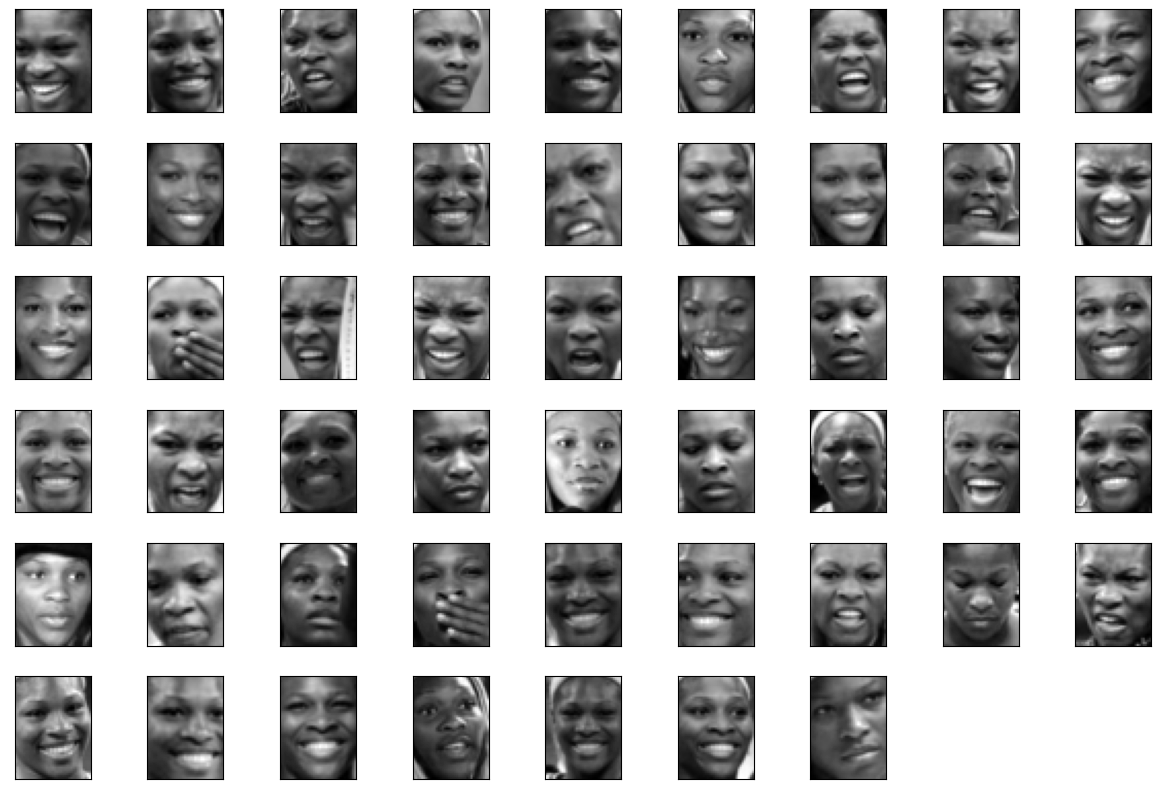

In [4]:
# Filtrar las imágenes de Serena Williams
serena_index = np.where(lfw_people.target_names == "Serena Williams")[0][0]
serena_images = lfw_people.images[lfw_people.target == serena_index]

# Número de imágenes de Serena Williams
num_serena_images = len(serena_images)
print(f"Serena Williams tiene {num_serena_images} imágenes.")

# Graficar las imágenes en una matriz
fig, axes = plt.subplots(6, 9, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.3, wspace=0.3))

for i, ax in enumerate(axes.flat):
    if i < num_serena_images:
        ax.imshow(serena_images[i], cmap='gray')
    else:
        ax.axis('off')

plt.show()

Para graficar las imágenes de Serena Williams, primero filtramos sus imágenes utilizando su índice en target_names, luego contamos el número de imágenes y finalmente las graficamos en una matriz de 6 filas por 9 columnas. Al analizar las imágenes, observamos que Serena Williams tiene muchas fotografías capturadas desde varias expresiones y ángulos, lo que proporciona una rica diversidad de datos. Esta diversidad en las imágenes de Serena Williams ayudará a capturar una amplia gama de variaciones faciales en las componentes principales, mejorando la capacidad del modelo para reconocer diferentes expresiones y ángulos.

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

In [5]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

In [6]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [7]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [8]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [9]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [10]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [11]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [12]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [13]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).